# A/B Test: Spiced search results - changing title color

#### Group A

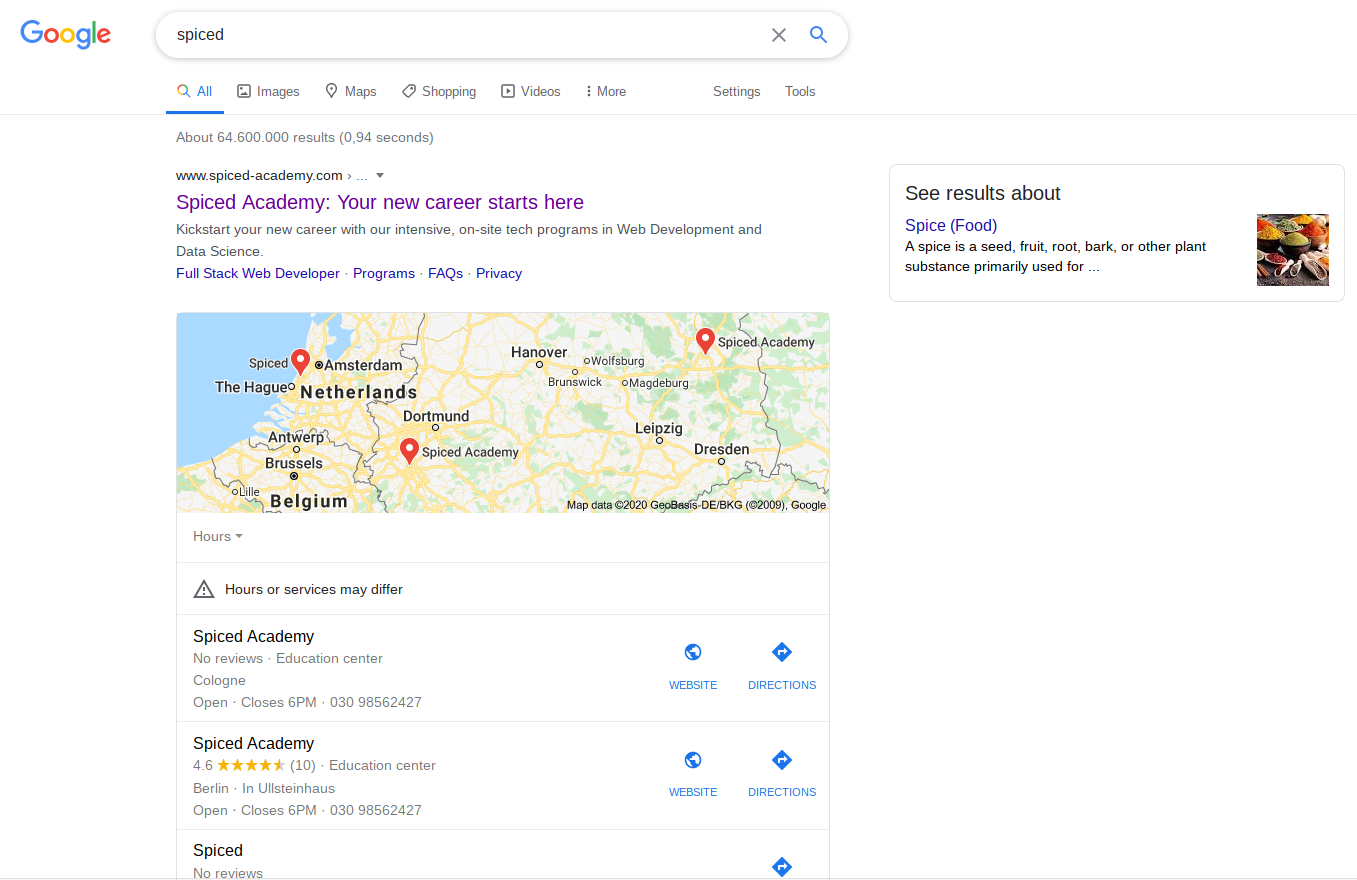

#### Group B

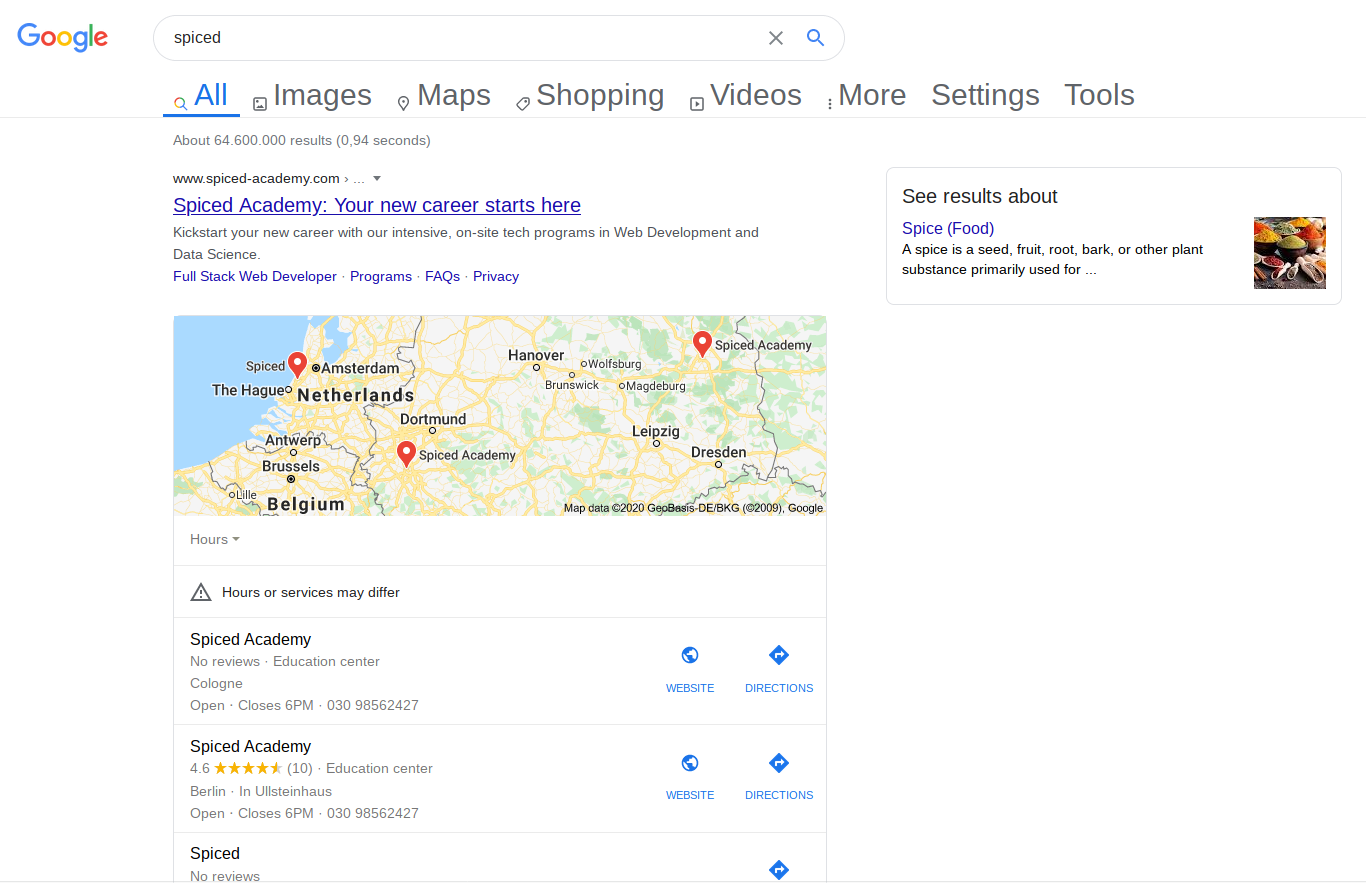

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize

## Data set

In [2]:
visitors = pd.read_csv('visitors.csv')
visitors.drop(columns='Unnamed: 0', inplace= True)

visitors.head()

,purple,blue
0,32.357176,24.010799
1,24.045122,27.687188
2,37.163535,31.237893
3,28.436741,31.229691
4,26.397056,30.318586


## Groups means and their difference

In [3]:
visitors['purple'].mean()

30.04092225248258

In [4]:
visitors['blue'].mean()

26.5187288956686

In [5]:
round(visitors['purple'].mean() - visitors['blue'].mean(),2)

3.52

## Boxplots

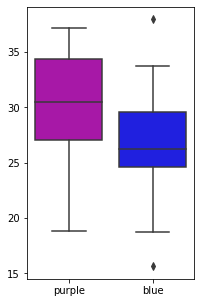

In [6]:
plt.figure(figsize=(3,5))

my_pal = {"blue": "blue", "purple": "m"}

sns.boxplot(data=visitors, palette=my_pal);

In [7]:
visitors

,purple,blue
0,32.357176,24.010799
1,24.045122,27.687188
2,37.163535,31.237893
3,28.436741,31.229691
4,26.397056,30.318586
5,34.435815,25.389542
6,34.297942,26.623565
7,26.817382,24.386026
8,30.078482,30.208374
9,18.786575,37.954803


## Histogram

In [8]:
visitors_long = pd.melt(visitors,                          
                var_name='color',        
                value_name='visitors' 
                )
visitors_long

,color,visitors
0,purple,32.357176
1,purple,24.045122
2,purple,37.163535
3,purple,28.436741
4,purple,26.397056
5,purple,34.435815
6,purple,34.297942
7,purple,26.817382
8,purple,30.078482
9,purple,18.786575


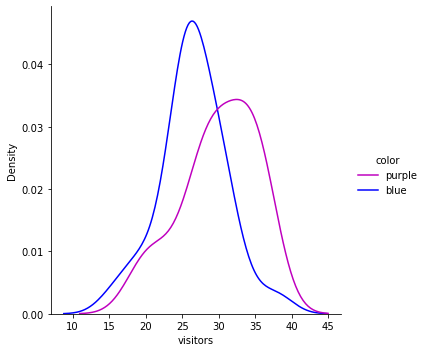

In [9]:
my_pal = {"blue": "blue", "purple": "m"}

sns.displot(data=visitors_long, x='visitors', hue = 'color', kind= 'kde',
            palette= my_pal);

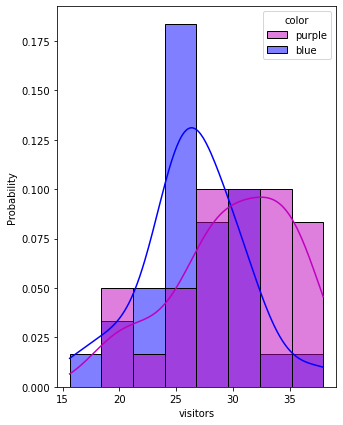

In [10]:
plt.figure(figsize=(5,7))

my_pal = {"blue": "blue", "purple": "m"}

sns.histplot(data=visitors_long, x='visitors',hue= 'color', kde= True, stat= 'probability',
             palette= my_pal);

## Two-sample t-test
### (assumming equal variances in the two samples)

In [11]:
import scipy.stats as stats

purple = visitors['purple']
blue = visitors['blue']

stats.ttest_ind(a=purple, b=blue, equal_var=True)


Ttest_indResult(statistic=2.8205655591656997, pvalue=0.0065516837403135405)

### Conclusion: Which group is better ??

Based on the boxplot results, the Purple group had a higher mean, therefore, it performed better than the blue one.

## Bootstrap sampling to calculate the confidence interval of the difference between the mean of the two groups

In [12]:
mean_differences = []

for i in range(10000):
    mean_bootstrap_purple = visitors['purple'].sample(n=100, replace='True').mean()  # take samples with replacement from data purple
    mean_bootstrap_blue = visitors['blue'].sample(n=100, replace='True').mean()    # take samples with replacement from data blue
    mean_differences.append(mean_bootstrap_purple -  mean_bootstrap_blue)


## Distribution plot of the mean differences obtained from the bootstrap samples

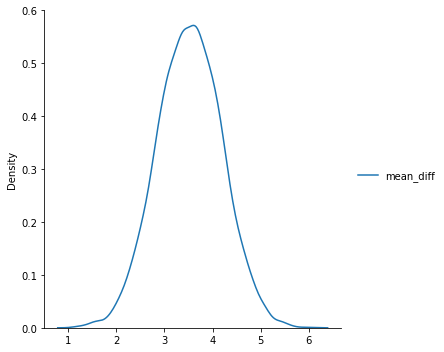

In [13]:
mean_differences = pd.DataFrame({'mean_diff':mean_differences})

sns.displot(data= mean_differences, kind='kde');

## Upper and the lower bound of the confidence interval

In [14]:
alpha = 0.95

lower_quantile = (1-alpha)/2  

upper_quantile = alpha + ((1-alpha)/2)

upper_bound = mean_differences.quantile(upper_quantile).values 
lower_bound = mean_differences.quantile(lower_quantile).values

print(f'confidence interval of the differences in mean between purple and blue group is between {lower_bound} and {upper_bound}')

confidence interval of the differences in mean between purple and blue group is between [2.2114013] and [4.83991082]
